Valores NaN no dataframe:
ID                              0
Delivery_person_ID              0
Delivery_person_Age             0
Delivery_person_Ratings        10
Restaurant_latitude             0
Restaurant_longitude            0
Delivery_location_latitude      0
Delivery_location_longitude     0
Time_Orderd                     0
Time_Order_picked               0
Weatherconditions               0
Road_traffic_density            0
Vehicle_condition               0
Type_of_order                   0
Type_of_vehicle                 0
multiple_deliveries            52
Festival                        0
City                            0
Time_taken(min)                 0
dtype: int64
**************************************************
Média do tempo de entrega: 25.54
Mediana do tempo de entrega: 25.00
Desvio padrão do tempo de entrega: 8.53
**************************************************


<ipython-input-17-36086d23367c>:26: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


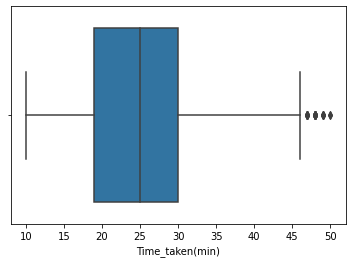

Correlações entre 'Time_taken(min)' e outras colunas numéricas (sem outliers):
Time_taken(min)                1.000000
multiple_deliveries            0.316485
Delivery_person_Age            0.285499
Delivery_location_latitude     0.066849
Restaurant_latitude            0.065335
Type_of_order                  0.012108
Delivery_location_longitude   -0.010144
Restaurant_longitude          -0.013658
Type_of_vehicle               -0.082700
Weatherconditions             -0.153396
Road_traffic_density          -0.194240
City                          -0.221202
Vehicle_condition             -0.251982
Delivery_person_Ratings       -0.335739
Festival                            NaN
Name: Time_taken(min), dtype: float64

Positivamente correlacionadas: As variáveis 'multiple_deliveries' (0,317), 'Delivery_person_Age' (0,287), 'Delivery_location_latitude' (0,072) e 'Restaurant_latitude' (0,071) têm correlação positiva com o tempo de entrega.
 Isso significa que, à medida que o valor dessas variáveis 

<ipython-input-17-36086d23367c>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Festival'] = df_no_outliers['Festival'].map({'Não': 0, 'Sim': 1})


                            OLS Regression Results                            
Dep. Variable:        Time_taken(min)   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     111.3
Date:                Fri, 24 Mar 2023   Prob (F-statistic):          7.37e-193
Time:                        19:53:18   Log-Likelihood:                -5861.6
No. Observations:                1777   AIC:                         1.175e+04
Df Residuals:                    1765   BIC:                         1.181e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [17]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro



# Definir constantes
ALPHA = 0.05

# Carregar os dados
df = pd.read_excel('encoded_cleaned_test_gitup.xlsx')

# Verificar se há valores NaN no dataframe e remover linhas com NaN
print("Valores NaN no dataframe:")
print(df.isna().sum())
df = df.dropna()

# Calcular o IQR para cada coluna e filtrar outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Medir: Calcular estatísticas descritivas para o tempo de entrega
time_taken_mean_no_outliers = df_no_outliers["Time_taken(min)"].mean()
time_taken_median_no_outliers = df_no_outliers["Time_taken(min)"].median()
time_taken_std_no_outliers = df_no_outliers["Time_taken(min)"].std()
print("*"*50)
print(f"Média do tempo de entrega: {time_taken_mean_no_outliers:.2f}")
print(f"Mediana do tempo de entrega: {time_taken_median_no_outliers:.2f}")
print(f"Desvio padrão do tempo de entrega: {time_taken_std_no_outliers:.2f}")
print("*"*50)

# Analisar: Visualizar a distribuição do tempo de entrega e verificar se há outliers
sns.boxplot(x=df_no_outliers["Time_taken(min)"])
plt.show()

# Calcular as correlações no dataframe sem outliers
correlations_no_outliers = df_no_outliers.corr()["Time_taken(min)"].sort_values(ascending=False)
print("Correlações entre 'Time_taken(min)' e outras colunas numéricas (sem outliers):")
print(correlations_no_outliers)

print("""
Positivamente correlacionadas: As variáveis 'multiple_deliveries' (0,317), 'Delivery_person_Age' (0,287), 'Delivery_location_latitude' (0,072) e 'Restaurant_latitude' (0,071) têm correlação positiva com o tempo de entrega.\n Isso significa que, à medida que o valor dessas variáveis aumenta, o tempo de entrega também tende a aumentar.

Negativamente correlacionadas: As variáveis 'Delivery_person_Ratings' (-0,337), 'Vehicle_condition' (-0,249), 'City' (-0,219), 'Road_traffic_density' (-0,192), 'Weatherconditions' (-0,155), 'Type_of_vehicle' (-0,082), 'Delivery_location_longitude' (-0,008) e 'Restaurant_longitude' (-0,012) têm correlação negativa com o tempo de entrega. \n Isso significa que, à medida que o valor dessas variáveis aumenta, o tempo de entrega tende a diminuir.

Baixa correlação: A variável 'Type_of_order' (0,017) tem uma correlação próxima a zero, o que indica que não há uma relação linear clara entre essa variável e o tempo de entrega.")

""")


#Converter a coluna 'Festival' em uma coluna numérica (por exemplo, 0 para 'Não' e 1 para 'Sim')
df_no_outliers['Festival'] = df_no_outliers['Festival'].map({'Não': 0, 'Sim': 1})


#Selecionar as colunas numéricas para a análise de regressão
X = df_no_outliers[[
'Delivery_location_latitude',
'Restaurant_latitude',
'Delivery_location_longitude',
'Restaurant_longitude',
'Delivery_person_Ratings',
'Type_of_order',
'Vehicle_condition',
'Weatherconditions',
'Delivery_person_Age',
'multiple_deliveries',
'Road_traffic_density'
]]
y = df_no_outliers['Time_taken(min)']

#Adicionar uma constante ao conjunto de recursos (necessário para a regressão linear múltipla)
X = sm.add_constant(X)

#Ajustar o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

print(model.summary())

print("\n")
print("*"*50)
print("Análise da Regressão nos Outliers:")
print("""
R-squared e Adj. R-squared: O valor de R-squared é 0,410, o que indica que aproximadamente 41% da variabilidade na variável dependente (Time_taken(min)) pode ser explicada pelas variáveis independentes no modelo. \n O valor ajustado de R-squared, que leva em consideração o número de variáveis e o tamanho da amostra, também é próximo de 0,410, indicando um ajuste razoável do modelo.

P>|t|: Essa coluna indica a significância das variáveis independentes no modelo. Valores menores que 0,05 sugerem que a variável é estatisticamente significativa. \nNesse caso, Delivery_person_Ratings, Vehicle_condition, Weatherconditions, Delivery_person_Age, multiple_deliveries e Road_traffic_density são estatisticamente significativos, pois seus valores P são menores que 0,05.

Coeficientes: Os coeficientes mostram a relação entre a variável dependente e cada variável independente, mantendo outras constantes. \n Por exemplo, um aumento de uma unidade no Delivery_person_Ratings está associado a uma diminuição de 8,8666 unidades no tempo de entrega (Time_taken(min)), mantendo constantes todas as outras variáveis.
""")

#Realizar o teste de Shapiro-Wilk na coluna 'Time_taken(min)'
shapiro_test = shapiro(df_no_outliers['Time_taken(min)'])

print("\n")
print("="*50)
print("Teste de Normalidade:")
print("Estatística de Shapiro-Wilk:", shapiro_test[0])
print("Valor-p de Shapiro-Wilk:", shapiro_test[1])
print("\n")
print("="*50)

#Analisar o resultado do teste de normalidade
print("Como o valor-p é menor que 0,05 (ou 5%), rejeitamos a hipótese nula. Isso significa que há evidências suficientes para afirmar que a coluna 'Time_taken(min)' não tem uma distribuição normal.")
